In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder

In [517]:
def wrangle(filepath):

    df = pd.read_csv(filepath)

    # #creating  binary
    df['Grades']= (df['Grades']>8).astype(int)

    # #dropping student_ID column
    df.drop(columns= 'Student_ID',inplace = True)
    df.drop(columns= 'Gender',inplace = True)


    return df

In [518]:
df = wrangle(r"C:\Users\HP\Desktop\student_lifestyle_dataset..csv")

In [519]:
df

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Grades
0,6.9,3.8,8.7,2.8,1.8,Moderate,0
1,5.3,3.5,8.0,4.2,3.0,Low,0
2,5.1,3.9,9.2,1.2,4.6,Low,0
3,6.5,2.1,7.2,1.7,6.5,Moderate,0
4,8.1,0.6,6.5,2.2,6.6,High,1
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,Moderate,1
1996,6.3,2.8,8.8,1.5,4.6,Moderate,0
1997,6.2,0.0,6.2,0.8,10.8,Moderate,0
1998,8.1,0.7,7.6,3.5,4.1,High,0


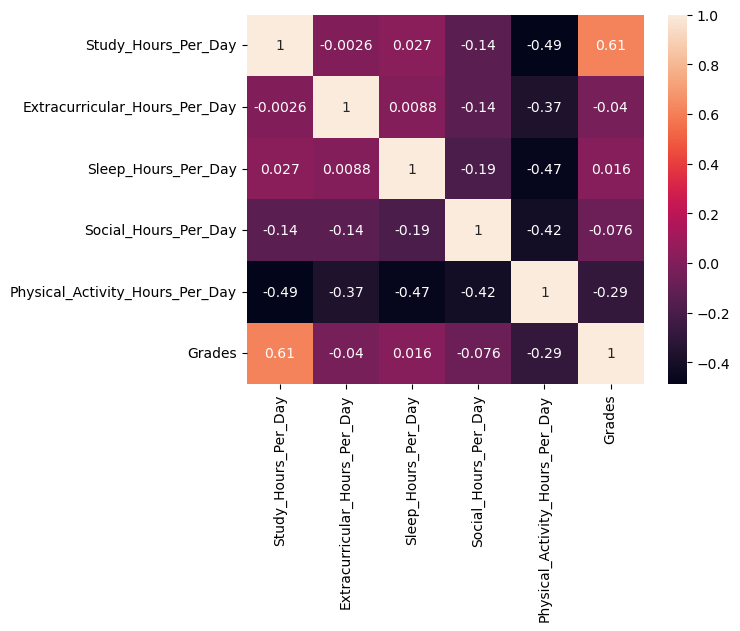

In [542]:
#checking multicollinearity column

correlation = df.select_dtypes('number')
sns.heatmap(correlation.corr(), annot = True)
plt.show()

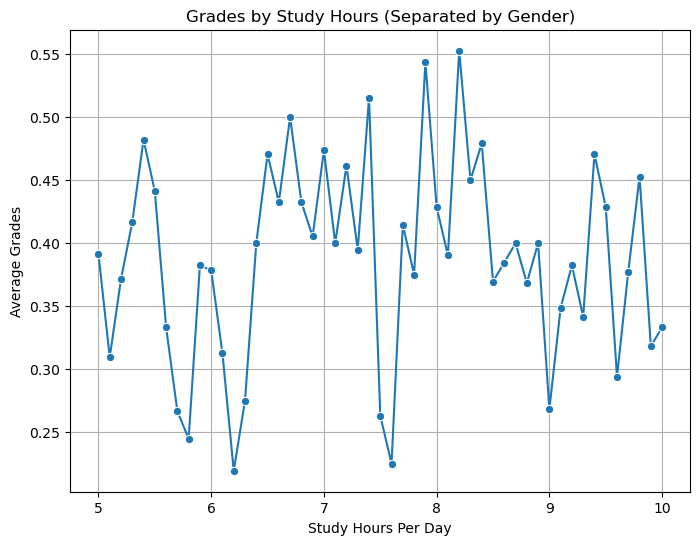

In [550]:

# Group by Study Hours and Gender, then calculate average Grades
line_data = df.groupby(['Sleep_Hours_Per_Day'])['Grades'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(data=line_data, x='Sleep_Hours_Per_Day', y='Grades', marker='o')
plt.title('Grades by Study Hours (Separated by Gender)')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Average Grades')
plt.grid(True)
plt.show()


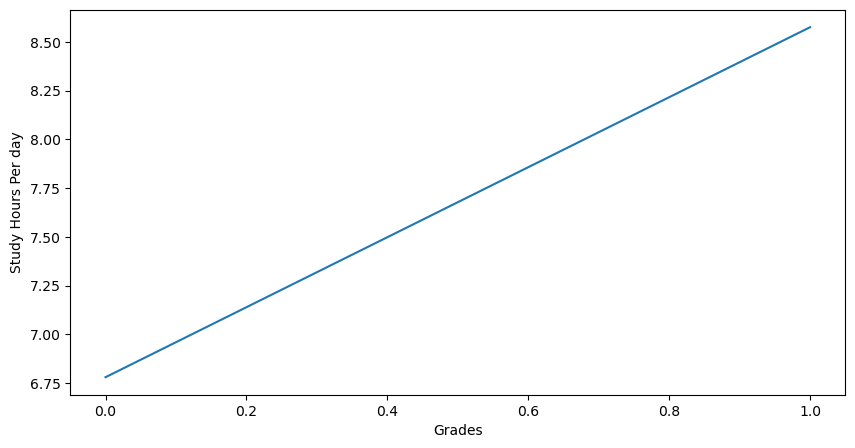

In [544]:
avg_body_by_year = df.groupby('Grades')['Study_Hours_Per_Day'].mean()
avg_body_by_year.plot(kind='line', figsize=(10,5))
plt.xlabel('Grades')
plt.ylabel('Study Hours Per day')
plt.show()

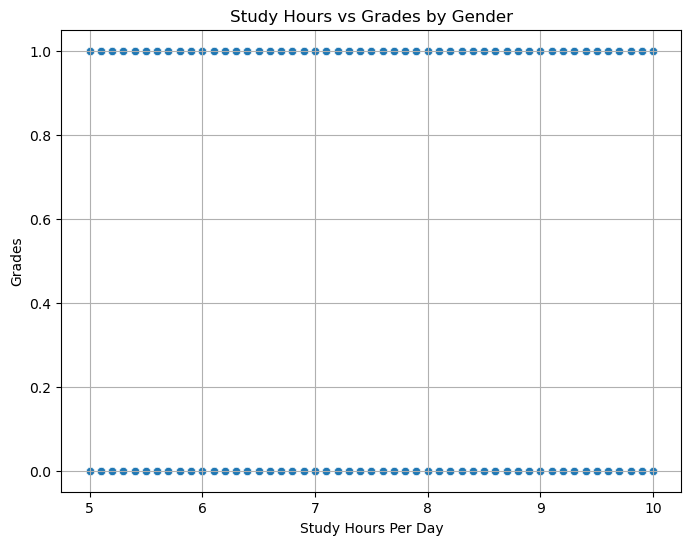

In [549]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sleep_Hours_Per_Day', y='Grades')
plt.title('Study Hours vs Grades by Gender')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Grades')
plt.grid(True)
plt.show()


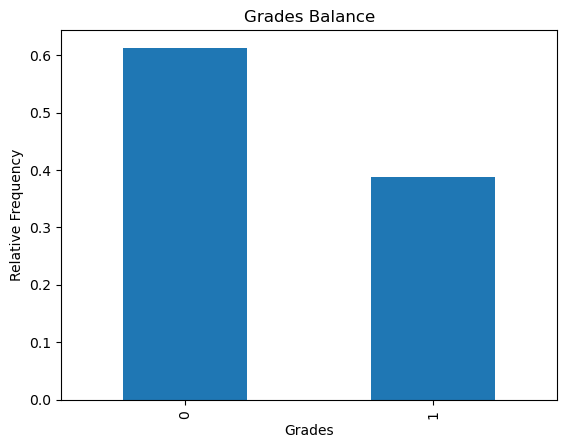

In [546]:
df['Grades'].value_counts(normalize=True).plot(kind='bar', xlabel ='Grades', ylabel ='Relative Frequency', title ='Grades Balance');

In [520]:
#spliting
X = df.drop(columns = 'Grades')
y = df['Grades']

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [522]:
#Baseline
Baseline = y_train.value_counts(normalize=True).max()
Baseline

0.603125

In [536]:
model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth = 3,random_state= 42))

In [537]:
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Stress_Level'],
                                mapping=[{'col': 'Stress_Level',
                                          'data_type': dtype('O'),
                                          'mapping': Moderate    1
High        2
Low         3
NaN        -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [538]:
Y_pred_test = model.predict(X_train)

In [539]:
train_accuracy_score = model.score(X_train, y_train)
validation_accuracy_score = model.score(X_val, y_val)
test_accuracy_score = model.score(X_test, y_test)

In [540]:
print(train_accuracy_score)
print(validation_accuracy_score)
print(test_accuracy_score)

0.79765625
0.809375
0.8125


In [528]:
tree_dept = model.named_steps['decisiontreeclassifier'].get_depth()

In [529]:
tree_dept


19

In [530]:
dept_hyperparameters = range(1, 19, 2)

In [531]:
training_accr = []
validation_accr = []

for d in dept_hyperparameters:

    test_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth = d,random_state= 42))

    test_model.fit(X_train, y_train)

    training_accr.append(test_model.score(X_train, y_train))
    validation_accr.append(test_model.score(X_val, y_val))


print("Training Accuracy Scores:", training_accr[:3])
print("Validation Accuracy Scores:", validation_accr[:3])

Training Accuracy Scores: [0.79296875, 0.79765625, 0.81328125]
Validation Accuracy Scores: [0.803125, 0.809375, 0.79375]


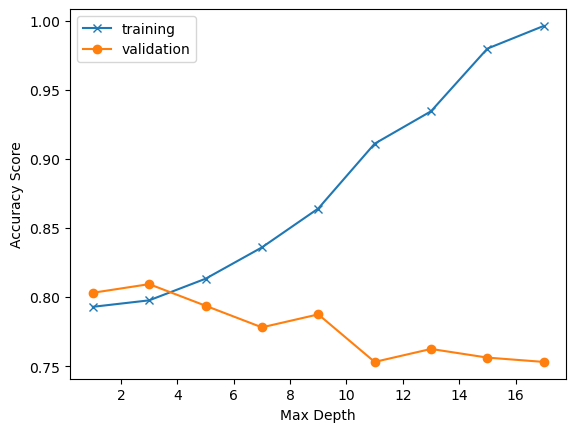

In [532]:
plt.plot(dept_hyperparameters, training_accr, label ='training', marker = 'x')
plt.plot(dept_hyperparameters, validation_accr, label ='validation', marker = "o")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

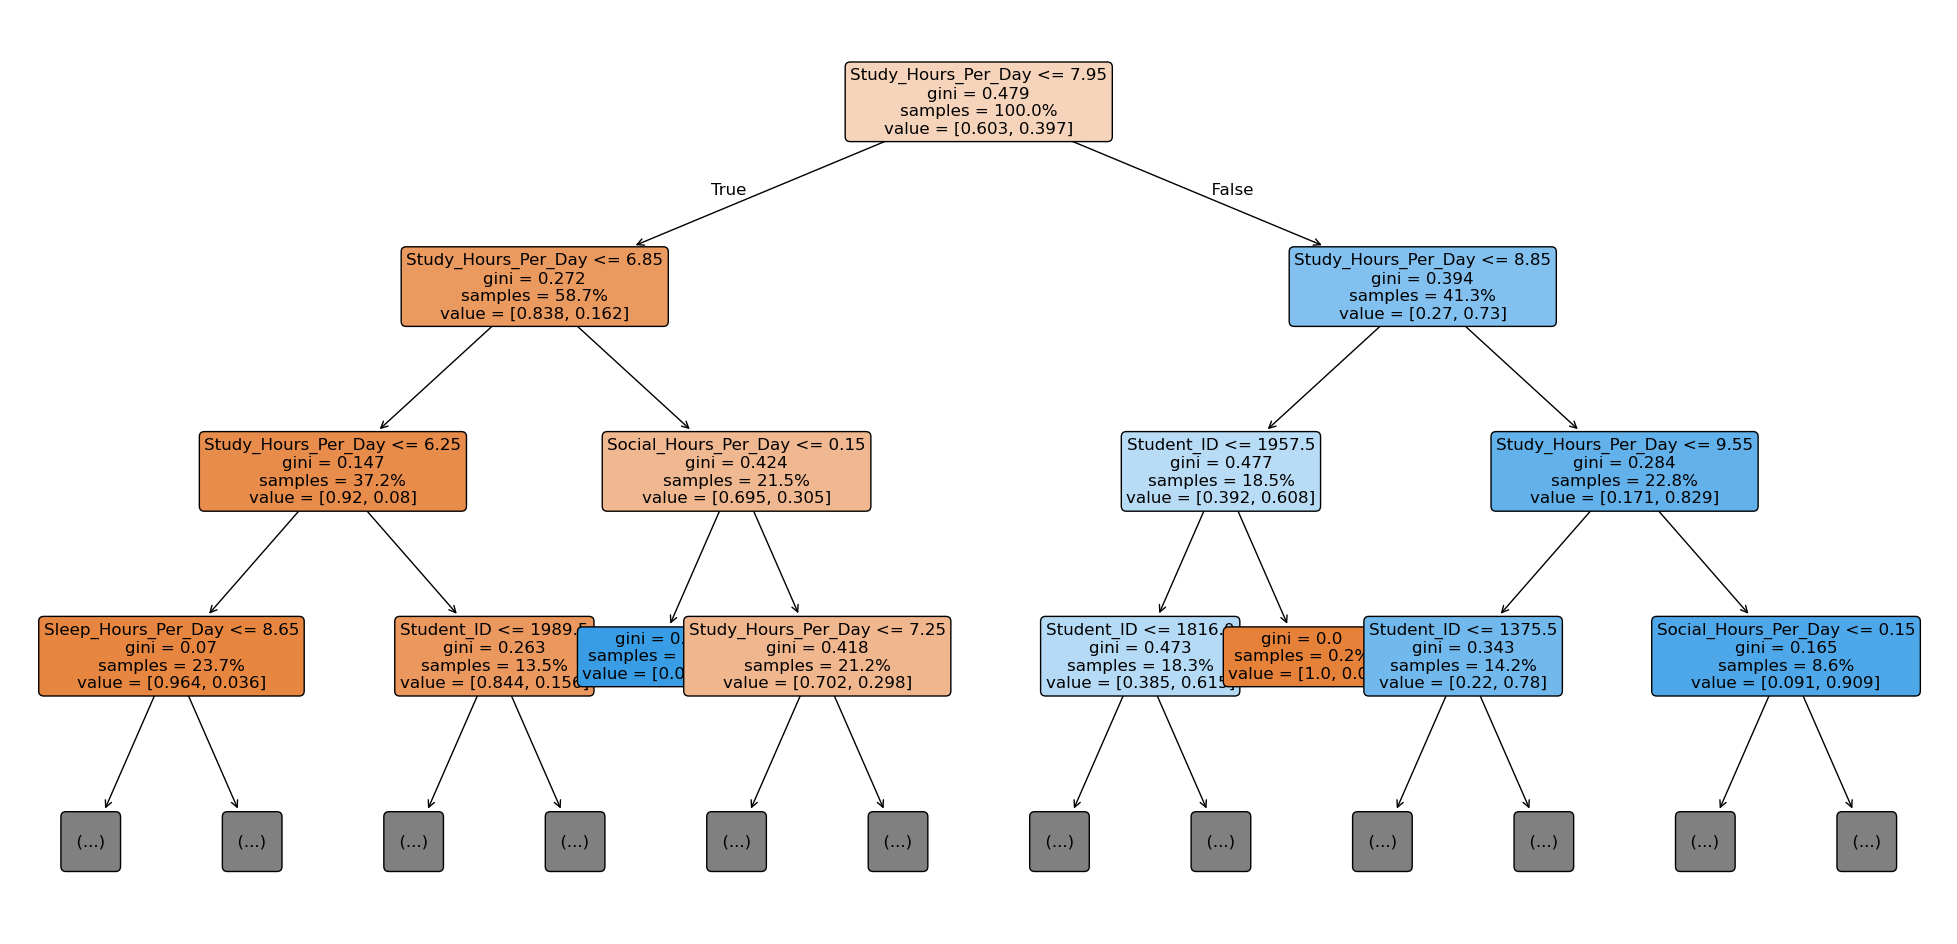

In [386]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps['decisiontreeclassifier'],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [533]:
features = X_train.columns
importance = model.named_steps['decisiontreeclassifier'].feature_importances_

In [534]:
features_important = pd.Series( importance, index= features).sort_values()

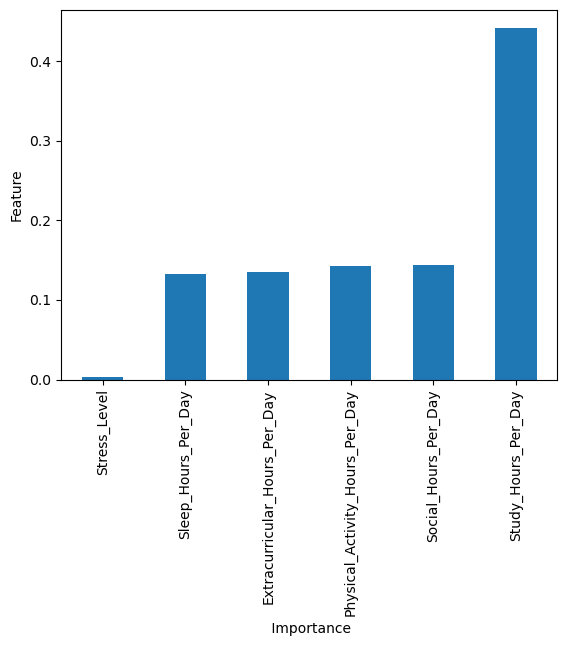

In [541]:
features_important.plot(kind= 'bar')
plt.xlabel(' Importance')
plt.ylabel('Feature')
plt.show()

In [596]:
def predict_student_lifestyle (Study_Hours_Per_Day, Extracurricular_Hours_Per_Day , Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day,Stress_Level):
    input = {'Study_Hours_Per_Day' : Study_Hours_Per_Day, 'Extracurricular_Hours_Per_Day': Extracurricular_Hours_Per_Day , 'Sleep_Hours_Per_Day': Sleep_Hours_Per_Day, 'Social_Hours_Per_Day': Social_Hours_Per_Day,
    'Physical_Activity_Hours_Per_Day': Physical_Activity_Hours_Per_Day, 'Stress_Level':Stress_Level}
                         
    df = pd.DataFrame(input, index=[0])
    prediction= model.predict(df)
    if prediction == 1:
        return 'This person will have a very good grade'
    else:
        return 'This person is likely not to have a good grade'

In [597]:
predict_student_lifestyle(6.9,3.8,8.7,2.8,1.8,'Moderate')

'This person is likely not to have a good grade'